In [46]:
import pandas as pd
import numpy as np

# Load

In [47]:
train_df = pd.read_csv("../../data/train.csv")
train_df

,year,is_disturbance,forest_id,blue,green,red,near_infrared,shortwave_infrared_1,shortwave_infrared_2
0,1985,0,87,349.0,714.000000,480.000000,4015.000000,2014.000000,652.0
1,1986,0,87,310.0,507.000000,384.000000,3916.000000,1890.000000,606.0
2,1987,0,87,329.0,606.000000,457.000000,4043.000000,2225.000000,856.0
3,1988,0,87,230.0,500.000000,286.000000,3815.000000,1952.000000,646.0
4,1989,0,87,178.0,491.000000,390.000000,3839.000000,2103.000000,755.0
...,...,...,...,...,...,...,...,...,...
272205,2014,0,19818,205.0,434.000000,215.000000,2566.000000,763.000000,301.0
272206,2015,0,19818,179.0,397.000000,249.000000,2116.000000,845.000000,383.0
272207,2016,0,19818,176.0,402.333333,245.333333,2240.666667,868.333333,390.0
272208,2017,0,19818,173.0,407.666667,241.666667,2365.333333,891.666667,397.0


# Transform to windows_df

In [48]:
forest_ids = train_df["forest_id"].unique()
forest_ids

array([   87,    90,    93, ..., 19816, 19817, 19818], shape=(8193,))

In [49]:
# forest_ids = forest_ids[:20]

In [50]:
windows_df = pd.DataFrame(
    columns=[
        "is_disturbance",
        "forest_id",
        "start_year",
        "end_year",
        "red_avg",
        "red_max",
        "red_min",
        "red_max_diff",
        "blue_avg",
        "blue_max",
        "blue_min",
        "blue_max_diff",
        "green_avg",
        "green_max",
        "green_min",
        "green_max_diff",
    ]
)

In [ ]:
def my_sliding_window(forest_df, forest_id, windows_size=3, shift=1):
    """
    Create a sliding window of size `windows_size` over the `forest_df` DataFrame.
    The window slides with a step size of `shift`.
    """
    my_windows = pd.DataFrame(columns=windows_df.columns)

    

    for i in range(0, len(forest_df) - windows_size + 1, shift):
        window_df = forest_df.iloc[i : i + windows_size]

        # is_disturbance = window_df["is_disturbance"].any()
        is_disturbance = window_df["is_disturbance"].first

        start_year = window_df["year"].min()
        end_year = window_df["year"].max()

        # Red calculations
        red_avg = window_df["red"].mean()
        red_max = window_df["red"].max()
        red_min = window_df["red"].min()
        red_max_diff = red_max - red_min

        # Blue calculations
        blue_avg = window_df["blue"].mean()
        blue_max = window_df["blue"].max()
        blue_min = window_df["blue"].min()
        blue_max_diff = blue_max - blue_min

        # Green calculations
        green_avg = window_df["green"].mean()
        green_max = window_df["green"].max()
        green_min = window_df["green"].min()
        green_max_diff = green_max - green_min

        window_df = pd.DataFrame(
            data={
                "forest_id": forest_id,
                "is_disturbance": is_disturbance,
                "start_year": start_year,
                "end_year": end_year,
                "red_avg": red_avg,
                "red_max": red_max,
                "red_min": red_min,
                "red_max_diff": red_max_diff,
                "blue_avg": blue_avg,
                "blue_max": blue_max,
                "blue_min": blue_min,
                "blue_max_diff": blue_max_diff,
                "green_avg": green_avg,
                "green_max": green_max,
                "green_min": green_min,
                "green_max_diff": green_max_diff,
            },
            index=[0],
        )

        my_windows = pd.concat([my_windows, window_df], ignore_index=True)

    # Normalize the columns
    my_windows["red_max_diff"] = (my_windows["red_max_diff"] - my_windows["red_max_diff"].min()) / (my_windows["red_max_diff"].max() - my_windows["red_max_diff"].min())
    my_windows["blue_max_diff"] = (my_windows["blue_max_diff"] - my_windows["blue_max_diff"].min()) / (my_windows["blue_max_diff"].max() - my_windows["blue_max_diff"].min())
    my_windows["green_max_diff"] = (my_windows["green_max_diff"] - my_windows["green_max_diff"].min()) / (my_windows["green_max_diff"].max() - my_windows["green_max_diff"].min())

    return my_windows

In [52]:
for forest_id in forest_ids:
    forest_df = train_df[train_df["forest_id"] == forest_id]
    forest_df = forest_df.sort_values(by=["year"])
    forest_df = forest_df.reset_index()

    # Call the sliding window function
    windows = my_sliding_window(forest_df, forest_id, windows_size=3, shift=1)

    windows_df = pd.concat([windows_df, windows], ignore_index=True)

/tmp/ipykernel_567/1046569993.py:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  my_windows = pd.concat([my_windows, window_df], ignore_index=True)
/tmp/ipykernel_567/4199485877.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  windows_df = pd.concat([windows_df, windows], ignore_index=True)
/tmp/ipykernel_567/1046569993.py:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA co

# Get insights

In [53]:
windows_df

,is_disturbance,forest_id,start_year,end_year,red_avg,red_max,red_min,red_max_diff,blue_avg,blue_max,blue_min,blue_max_diff,green_avg,green_max,green_min,green_max_diff
0,<bound method NDFrame.first of 0 0\n1 ...,87,1985,1987,440.333333,480.000000,384.000000,2.142857e-01,329.333333,349.0,310.0,0.033133,609.000000,714.000000,507.000000,0.764423
1,<bound method NDFrame.first of 0 0\n1 ...,87,1986,1988,375.666667,457.000000,286.000000,5.969388e-01,289.666667,329.0,230.0,0.213855,537.666667,606.000000,500.000000,0.278846
2,<bound method NDFrame.first of 0 0\n1 ...,87,1987,1989,377.666667,457.000000,286.000000,5.969388e-01,245.666667,329.0,178.0,0.370482,532.333333,606.000000,491.000000,0.322115
3,<bound method NDFrame.first of 0 0\n1 ...,87,1988,1990,404.000000,536.000000,286.000000,1.000000e+00,275.000000,417.0,178.0,0.635542,543.333333,639.000000,491.000000,0.480769
4,<bound method NDFrame.first of 0 0\n1 ...,87,1989,1991,442.333333,536.000000,390.000000,4.693878e-01,271.666667,417.0,178.0,0.635542,569.333333,639.000000,491.000000,0.480769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255820,<bound method NDFrame.first of 0 0\n1 ...,19818,2011,2014,253.333333,323.000000,215.000000,2.583405e-01,214.500000,270.5,168.0,0.276504,470.500000,526.500000,434.000000,0.202391
255821,<bound method NDFrame.first of 0 0\n1 ...,19818,2013,2015,228.666667,249.000000,215.000000,6.843456e-02,184.000000,205.0,168.0,0.088825,427.333333,451.000000,397.000000,0.107172
255822,<bound method NDFrame.first of 0 0\n1 ...,19818,2014,2016,236.444444,249.000000,215.000000,6.843456e-02,186.666667,205.0,176.0,0.065903,411.111111,434.000000,397.000000,0.065128
255823,<bound method NDFrame.first of 0 0\n1 ...,19818,2015,2017,245.333333,249.000000,241.666667,2.188156e-16,176.000000,179.0,173.0,0.000000,402.333333,407.666667,397.000000,0.000000


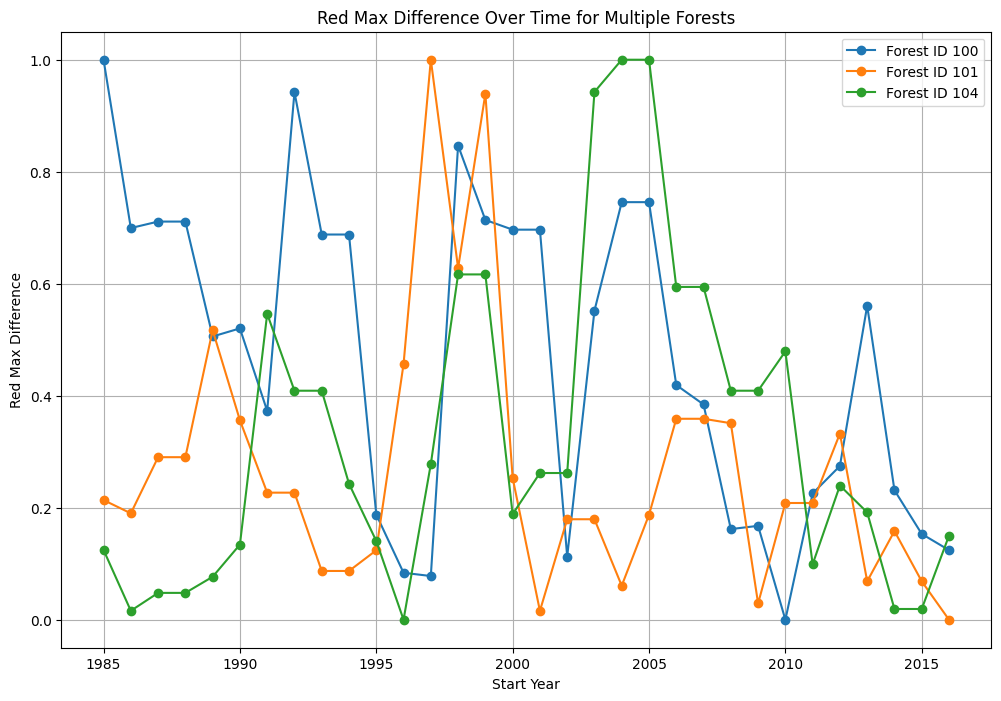

In [54]:
import matplotlib.pyplot as plt

# Select 10 forest IDs to plot
additional_forest_ids = forest_ids[7:10]  # Adjust this to select specific IDs if needed

plt.figure(figsize=(12, 8))

# Plot for additional forest IDs
for forest_id in additional_forest_ids:
    forest_data = windows_df[windows_df["forest_id"] == forest_id]
    plt.plot(forest_data["start_year"], forest_data["red_max_diff"], marker='o', label=f"Forest ID {forest_id}")

plt.xlabel(xlabel="Start Year")
plt.ylabel(ylabel="Red Max Difference")
plt.title(label="Red Max Difference Over Time for Multiple Forests")
plt.grid(visible=True)
plt.legend()
plt.show()

TypeError: float() argument must be a string or a real number, not 'method'

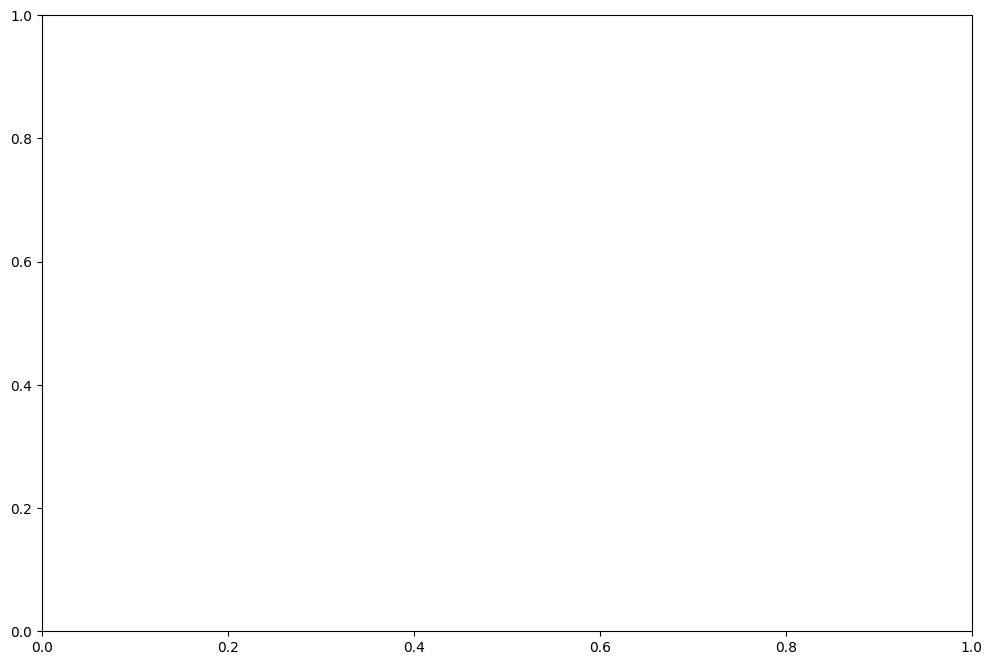

In [55]:
import matplotlib.pyplot as plt

# Select 10 forest IDs to plot
additional_forest_ids = forest_ids[7:10]  # Adjust this to select specific IDs if needed

plt.figure(figsize=(12, 8))

# Plot for additional forest IDs
for forest_id in additional_forest_ids:
    forest_data = windows_df[windows_df["forest_id"] == forest_id]
    plt.plot(forest_data["start_year"], forest_data["is_disturbance"], marker='o', label=f"Forest ID {forest_id}")

plt.xlabel(xlabel="Start Year")
plt.ylabel(ylabel="Red Max Difference")
plt.title(label="Red Max Difference Over Time for Multiple Forests")
plt.grid(visible=True)
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Convert is_disturbance to binary (if not already)
windows_df["is_disturbance"] = windows_df["is_disturbance"].astype(int)

# Drop any rows with NaN values
windows_df = windows_df.dropna()

# Define features and labels
X = windows_df
#y = windows_df["is_disturbance"]

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Resample to reduce imbalance

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
majority = X_train[X_train["is_disturbance"] == 0]
minority = X_train[X_train["is_disturbance"] == 1]

# Upsample minority class
minority_upsampled = resample(
    minority,
    replace=True, # sample with replacement
    n_samples=len(majority),  # match majority class size
    random_state=42, # reproducible results
)

# Combine majority class with upsampled minority class
X_train = pd.concat([majority, minority_upsampled]) # type: ignore

# Shuffle the dataset
X_train = X_train.sample(frac=1, random_state=42).reset_index(drop=True)

# Machine Learning

In [ ]:
y_train = X_train["is_disturbance"]
X_train = X_train[["red_max_diff", "blue_max_diff", "green_max_diff"]]

y_test = X_test["is_disturbance"]
X_test = X_test[["red_max_diff", "blue_max_diff", "green_max_diff"]]


# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_true=y_test, y_pred=y_pred))

Accuracy: 0.7523064894448788
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86     50496
           1       0.04      0.73      0.07       664

    accuracy                           0.75     51160
   macro avg       0.52      0.74      0.46     51160
weighted avg       0.98      0.75      0.85     51160



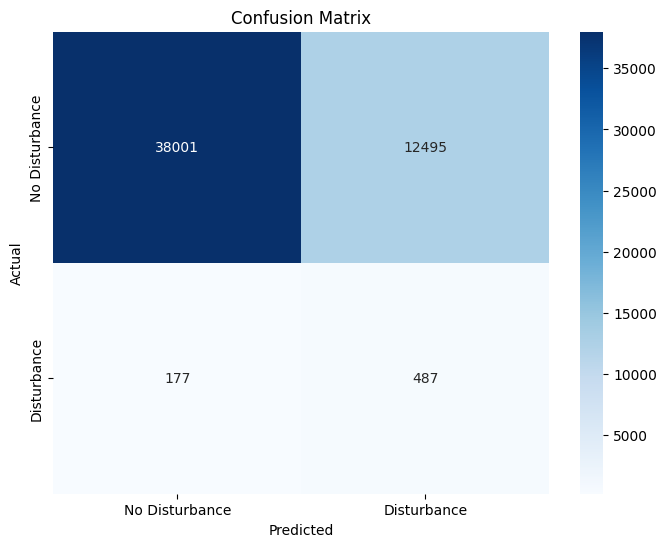

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disturbance', 'Disturbance'], yticklabels=['No Disturbance', 'Disturbance'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# get treshold of logistic regression
threshold = model.intercept_[0] + np.dot(X_test, model.coef_[0])
threshold

array([-1.07721284, -0.6515625 , -1.9154932 , ..., -0.58974714,
        2.06805931, -1.31541739], shape=(51160,))

In [ ]:
# Drop any rows with NaN values
only_yes = windows_df[windows_df["is_disturbance"] == 1] 

# Define features and labels
X = only_yes[["red_max_diff", "blue_max_diff", "green_max_diff"]]
y = only_yes["is_disturbance"]

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
accuracy = accuracy_score(y_true=y, y_pred=y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_true=y, y_pred=y_pred))

Accuracy: 0.7061021170610212
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.71      0.83      3212

    accuracy                           0.71      3212
   macro avg       0.50      0.35      0.41      3212
weighted avg       1.00      0.71      0.83      3212



/workspaces/forest_disturbance_detection/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/workspaces/forest_disturbance_detection/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/workspaces/forest_disturbance_detection/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [ ]:
y_pred

array([0, 1, 1, ..., 1, 1, 0], shape=(3212,))

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the AdaBoost classifier
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

# Make predictions
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Accuracy: {accuracy_adaboost}")
print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_adaboost))


AdaBoost Accuracy: 0.7196833463643472
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.84     50496
           1       0.03      0.75      0.06       664

    accuracy                           0.72     51160
   macro avg       0.51      0.73      0.45     51160
weighted avg       0.98      0.72      0.83     51160

